# COMP 472 - Mini Project 1

## Load dataset

Here we will be extracting and reading the JSON file into a Pandas DataFrame. We decided to use `pd.read_json()` rather than `json.load()` since DataFrames give us a more pleasant data type to work with.

In [1]:
import gzip
import json
import pandas as pd

# Read JSON file into Pandas DataFrame
f = gzip.open('goemotions.json.gz', 'rb')
df = pd.read_json(f)
df.columns = ['comment', 'emotion', 'sentiment']

# Close file
f.close()

Calling `DataFrame.head()` gives us a nice visual of our data.

In [2]:
df.head(10)

,comment,emotion,sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive
5,"He isn't as big, but he's still quite popular....",disapproval,negative
6,That's crazy; I went to a super [RELIGION] hig...,amusement,positive
7,that's adorable asf,amusement,positive
8,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",amusement,positive
9,"I have, and now that you mention it, I think t...",neutral,neutral


## Plotting Data

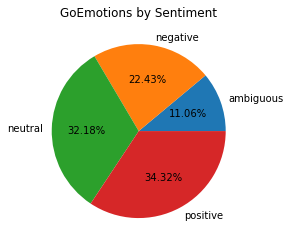

In [3]:
import matplotlib.pyplot as plt

sentiment = df.groupby(['sentiment'])['sentiment'].count()

plt.title('GoEmotions by Sentiment')
plt.pie(sentiment, labels = sentiment.index, autopct = '%1.2f%%')
plt.show()

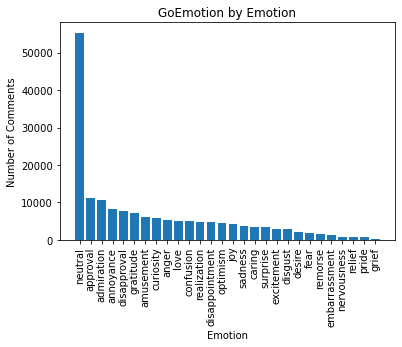

In [4]:
emotion = df.groupby(['emotion'])['emotion'].count().sort_values(ascending=False)

plt.bar(emotion.index, emotion)
plt.xticks(
    rotation=90, 
    fontweight='light',
)

plt.title('GoEmotion by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')

plt.show()

## Words as Features

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

comment_vector = vectorizer.fit_transform(df['comment'])
print(type(comment_vector))

<class 'scipy.sparse.csr.csr_matrix'>


In [6]:
vocab_size = comment_vector.shape[1]
print("Vocabulary size: " + str(vocab_size))

Vocabulary size: 30449


In [7]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(comment_vector, df, test_size=0.2)

#### Multinomial Naive bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB

#Emotion classifier
nb_classifier = MultinomialNB()
nb_emotion_model = nb_classifier.fit(x_train, y_train['emotion'])

In [9]:
v = vectorizer.transform(['Thank you!'])
nb_emotion_model.predict(v)

array(['gratitude'], dtype='<U14')

In [10]:
#Sentiment classifier
nb_sentiment_model = nb_classifier.fit(x_train, y_train['sentiment'])
v = vectorizer.transform(['Thank you!'])
nb_sentiment_model.predict(v)

array(['positive'], dtype='<U9')

##### Decision Tree

In [11]:
from sklearn import tree
from sklearn import preprocessing

#Emotion classifier
dtc_emotion_model = tree.DecisionTreeClassifier(criterion="entropy")
dtc_emotion_model.fit(x_train, y_train['emotion'])


#predictEmotionFromDT = dtc_emotion_model.predict(x_test[0:5])
#print(x_test[0:5])
#print(predictEmotionFromDT)

DecisionTreeClassifier(criterion='entropy')

In [12]:
#Sentiment classifier
dtc_sentiment_model = tree.DecisionTreeClassifier(criterion="entropy")
dtc_sentiment_model.fit(x_train, y_train['sentiment'])
#predictSentimentFromDT = dtc_sentiment_model.predict(x_test[0:5])
#print(predictSentimentFromDT)

DecisionTreeClassifier(criterion='entropy')

##### Multi-Layered Perceptron

In [13]:
from sklearn.neural_network import MLPClassifier

# Multi-Layered Perceptron classifier for emotion classification
mlpcClassifierEmotion = MLPClassifier(max_iter=10)
mlpcClassifierEmotion.fit(x_train, y_train['emotion'])

# Multi-Layered Perceptron classifier for sentiment classification
mlpcClassifierSentiment = MLPClassifier(max_iter=10)
mlpcClassifierSentiment.fit(x_train, y_train['sentiment'])
# mlpcClassifierEmotion.predict(x_test)
# mlpcClassifierEmotion.score(x_test, y_test['emotion'])

/Users/pashapishdad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pashapishdad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10)

In [16]:
mlpcClassifierEmotion.predict(x_test)
print("emotion score: ", mlpcClassifierEmotion.score(x_test, y_test['emotion']))

mlpcClassifierSentiment.predict(x_test)
print("sentiment score: ",mlpcClassifierEmotion.score(x_test, y_test['sentiment']))

emotion score:  0.39969153765568616
sentiment score:  0.1873181236177395


## Performance

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

performanceFile = open("Performane.txt", "w")

##### Multinomial Naive Bayes

In [19]:
#Performance of emotion classifier
nb_emotion_model_prediction = nb_emotion_model.predict(x_test)
mnb_emotion_report = classification_report(y_test['emotion'], nb_emotion_model_prediction)
#print(mnb_emotion_report)
# Confusion matrix
mnb_emotion_confusion_matrix = confusion_matrix(y_test['emotion'], nb_emotion_model_prediction)
#print(mnb_emotion_confusion_matrix)

/Users/pashapishdad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pashapishdad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pashapishdad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

In [20]:
#Performance of sentiment classifier
nb_sentiment_model_prediction = nb_sentiment_model.predict(x_test)
mnb_sentiment_report = classification_report(y_test['sentiment'], nb_sentiment_model_prediction)
#print(mnb_sentiment_report)
# Confusion matrix
mnb_sentiment_confusion_matrix = confusion_matrix(y_test['sentiment'], nb_sentiment_model_prediction)
#print(mnb_sentiment_confusion_matrix)

##### Decision Tree

In [21]:
#Performance of emotion classifier

DT_emotion_model_prediction = dtc_emotion_model.predict(x_test)
DT_emotion_report = classification_report(y_test['emotion'], DT_emotion_model_prediction)

#Confusion matrix
DT_emotion_confusion_matrix = confusion_matrix(y_test['emotion'], DT_emotion_model_prediction)

In [22]:
#Performance of sentiment classifier

DT_sentiment_model_prediction = dtc_sentiment_model.predict(x_test)
DT_sentiment_report = classification_report(y_test['sentiment'], DT_sentiment_model_prediction)

#Confusion matrix
DT_sentiment_confusion_matrix = confusion_matrix(y_test['sentiment'], DT_sentiment_model_prediction)

##### Multi-Layered Perceptron

In [71]:
performanceFile.write("Multi-layered Perceptron classifier for 'emotion'\n\n")

#Performance of emotion classifier
print(classification_report(y_test['emotion'], mlpcClassifierEmotion.predict(x_test)))
performanceFile.write(classification_report(y_test['emotion'], mlpcClassifierEmotion.predict(x_test)))

#Confusion matrix
print(confusion_matrix(y_test['emotion'], mlpcClassifierEmotion.predict(x_test)))
performanceFile.write(str(confusion_matrix(y_test['emotion'], mlpcClassifierEmotion.predict(x_test))))

performanceFile.write("\n\nMulti-layered Perceptron classifier for 'sentiment'\n\n")

#Performance of emotion classifier
print(classification_report(y_test['sentiment'], mlpcClassifierSentiment.predict(x_test)))
performanceFile.write(classification_report(y_test['sentiment'], mlpcClassifierSentiment.predict(x_test)))

#Confusion matrix
print(confusion_matrix(y_test['sentiment'], mlpcClassifierSentiment.predict(x_test)))
performanceFile.write(str(confusion_matrix(y_test['sentiment'], mlpcClassifierSentiment.predict(x_test))))


performanceFile.close()

                precision    recall  f1-score   support

    admiration       0.47      0.52      0.49      2056
     amusement       0.50      0.53      0.52      1248
         anger       0.31      0.29      0.30      1012
     annoyance       0.19      0.14      0.16      1744
      approval       0.23      0.16      0.19      2172
        caring       0.25      0.23      0.24       705
     confusion       0.27      0.22      0.24       998
     curiosity       0.33      0.29      0.31      1152
        desire       0.25      0.27      0.26       434
disappointment       0.17      0.16      0.17       932
   disapproval       0.25      0.22      0.23      1537
       disgust       0.25      0.23      0.24       582
 embarrassment       0.18      0.19      0.18       280
    excitement       0.27      0.18      0.22       639
          fear       0.42      0.42      0.42       369
     gratitude       0.76      0.74      0.75      1377
         grief       0.09      0.09      0.09  

## Exploration: different splits of training & test sets

##### Multinomial Naive bayes

In [18]:
#50% train, 50% test
nb_xTrain, nb_xtest, nb_yTrain, nb_yTest = train_test_split(comment_vector, df, test_size=0.5)

#Emotion classifier
nb_emotion_model2 = nb_classifier.fit(nb_xTrain, nb_yTrain['emotion'])

#Sentiment classifier
nb_sentiment_model2 =  nb_classifier.fit(nb_xTrain, nb_yTrain['sentiment'])

##### Decision Trees

In [19]:
#40% train, 60% test
DT_xTrain, DT_xtest, DT_yTrain, DT_yTest = train_test_split(comment_vector, df, test_size=0.6)

#Emotion classifier
dtc_emotion_model2 = tree.DecisionTreeClassifier(criterion = "entropy")
dtc_emotion_model2.fit(DT_xTrain, DT_yTrain['emotion'])


#Sentiment classifier
dtc_sentiment_model2 = tree.DecisionTreeClassifier(criterion = "entropy")
dtc_sentiment_model2.fit(DT_xTrain, DT_yTrain['sentiment'])


DecisionTreeClassifier(criterion='entropy')